# Susceptible Infected Recovered (SIR) Epidemic Model in Toronto

In [13]:
import geopandas as gpd
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

# working Dir
path = "D:/Dropbox/Data/20-03-25 COD data work/20-03-25 SIR/"

## Import Toronto Data

In [14]:
# import data into geopandas dataframe
gdf = gpd.read_file(path + '\RandomPoints1.gpkg')

In [34]:
# Get Toronto neighbourhood Boundaries
neighbourhood_map = gpd.read_file(path + 'Neighbourhoods/Neighbourhoods.shp')
pedestrian_map = gpd.read_file(path + 'pedestrian/pednet.shp')

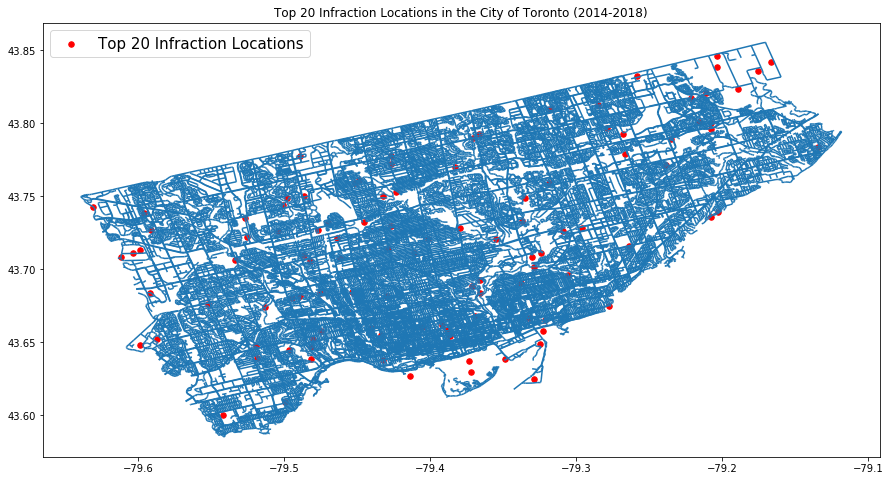

In [36]:
fig,ax = plt.subplots(figsize = (15,15))
pedestrian_map.plot(ax=ax)
gdf.plot(ax=ax, markersize = 30, color = "red", marker="o", label = "Top 20 Infraction Locations")
plt.title('Top 20 Infraction Locations in the City of Toronto (2014-2018)')
plt.legend(prop={'size':15})

## Python Code for Epidemic Spread Model from [The SIR epidemic model - SciPython](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)

In [43]:
# Total population, N.
N = 1000
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 1.6, 0.04 
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, beta/gamma
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

## Differential Equations describing the SIR Model
$\frac{dS}{dt} = −\frac{βSI}{N}$,

$\frac{dI}{dt}=\frac{βSI}{N}−γI$,

$\frac{dR}{dt}=γI$

In [44]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [45]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
y0

(959.0, 1, 40.0)

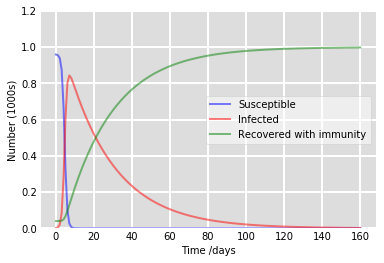

In [46]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.set_facecolor(color="#dddddd")
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()